In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from IPython.display import Image  
from sklearn.tree import export_graphviz
import plotly.graph_objects as go
import time

import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [2]:
org_data=pd.read_csv("D:\Extra\Learnbay_Course\Stats_ML\Capstone Project\HR_Employee_Attrition_Data.csv")

In [3]:
org_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
####Making a copy of org_data
df_copy=org_data.copy()

In [5]:
org_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# EDA

In [6]:
#### Dropping Columns with only 1 unique values and insignificant data like 'EmployeeNumber'
df_copy.drop(columns=['EmployeeCount','Over18','StandardHours','EmployeeNumber'],inplace=True)

### Analysis of variables

In [7]:
len(df_copy.columns)

31

In [8]:
# help(px.histogram)
# help(px.pie)


#### Using Plotly

# for i in df_copy.select_dtypes(include='object').columns:
#     if i !='Attrition':
#         pie_chart_data=df_copy[df_copy.Attrition=='Yes'].select_dtypes(include='object').pivot_table(values='Attrition',index=i,aggfunc='count')
        # fig=px.pie(pie_chart_data,values='Attrition',title=f"Plot of {i} Percentage contribution to Attrition",
        #                 color_discrete_sequence=px.colors.sequential.RdBu)


        # fig = go.Figure(data=[go.Pie(labels=list(pie_chart_data.index), values=pie_chart_data['Attrition'], hole=0.4)])
        # fig.update_layout(title=f"Plot of {i} Percentage contribution to Attrition")
        # fig.update_layout(showlegend=True,legend_title_text=f"{i}")
        # fig.update_layout(title_x=.5)
        # fig.show()


# '''Plotting the histogram of categorical variables w.r.t Attrition to analyse what is the rate of attrition 
# according to variables'''
# for i in df_copy.select_dtypes(include='object').columns:
#     fig=px.histogram(df_copy,x=i,color='Attrition',histfunc='count',title=f"Plot of {i} Counts",
#                      color_discrete_sequence=[px.colors.qualitative.Pastel1[1],px.colors.qualitative.Set1[1]],
#                      text_auto='.s')
#     fig.update_layout(title_x=.5)
#     fig.show()
#     break

In [12]:
attrition_count=df_copy['Attrition'].value_counts()
print(attrition_count)

'''This Shows that the maximum entries in attrition column is "No"'''

'This Shows that the maximum entries in attrition column is "No"'

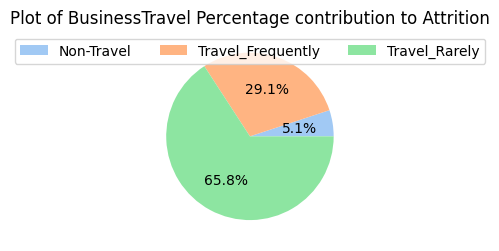

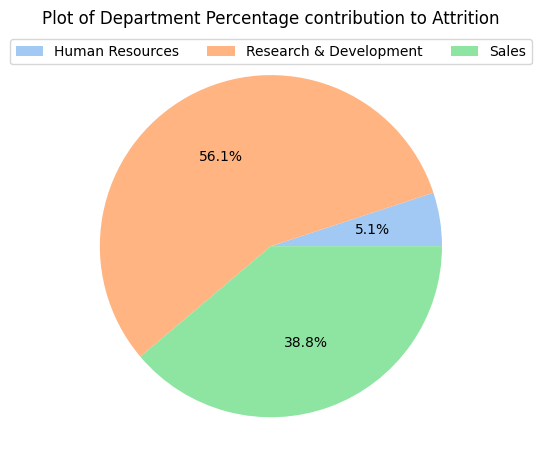

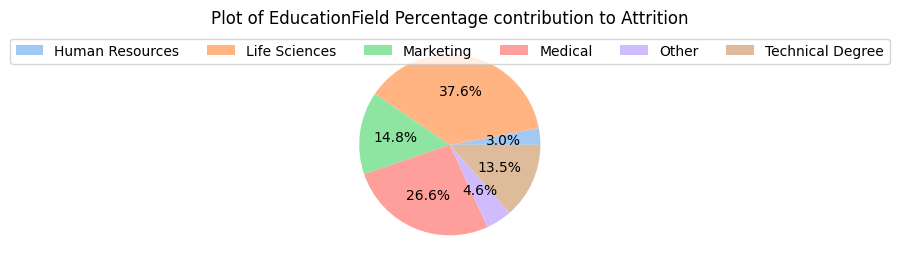

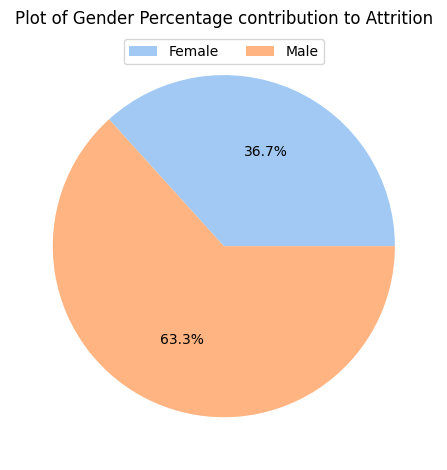

C:\Users\MercadosEMI\AppData\Local\Temp\ipykernel_2580\1027042942.py:12: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



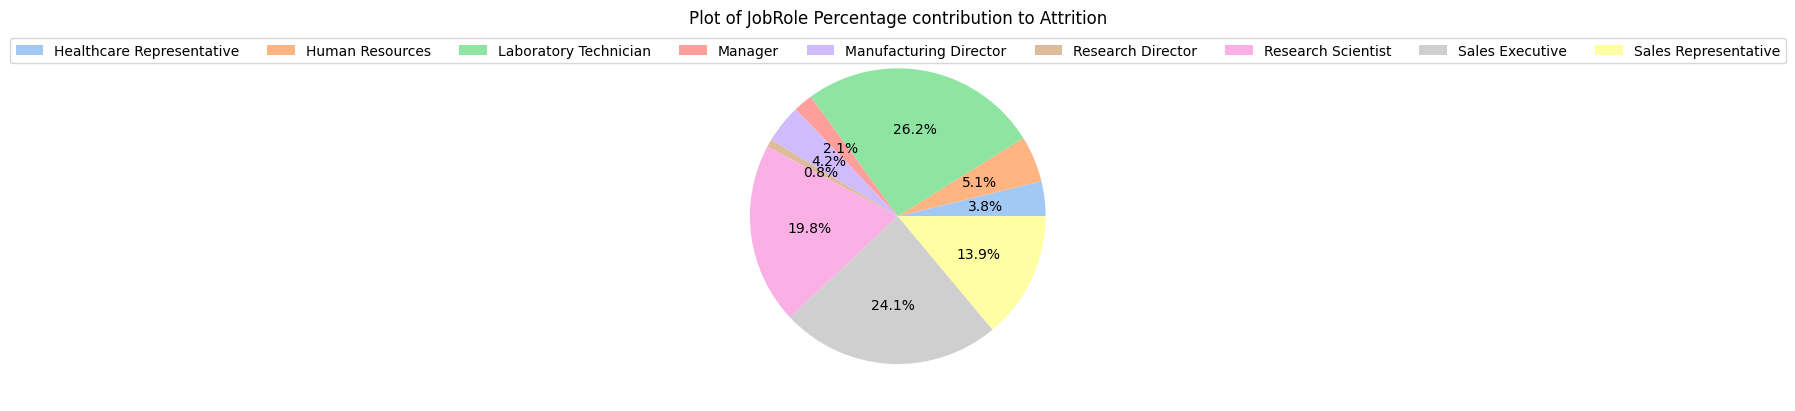

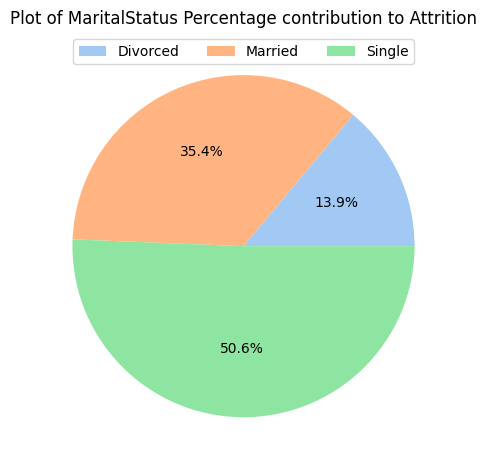

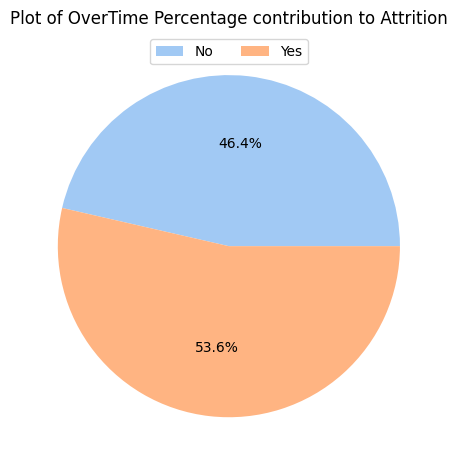

In [9]:
'''Plotting the histogram of some categorical variables w.r.t Attrition to analyse what is the rate of attrition 
according to variables'''
plt.figure(figsize=(4,3))
colors = sns.color_palette('pastel')[0:10]
for i in df_copy.select_dtypes(include='object').columns:
    if i !='Attrition':
        pie_chart_data=df_copy[df_copy.Attrition=='Yes'].select_dtypes(include='object').pivot_table(values='Attrition',index=i,aggfunc='count')
        #create pie chart
        plt.pie(pie_chart_data['Attrition'],colors = colors, autopct='%.1f%%')
        plt.title(f"Plot of {i} Percentage contribution to Attrition")
        plt.legend(pie_chart_data.index,loc=9,ncol=len(pie_chart_data.index))
        plt.tight_layout()
        plt.show()

### Findings from Above Analysis
1. The employees who travels_rarely have highest attrition.
2. Attrition in R&D department is highest.
3. People with LifeScience course and mediacl courses have higher Attrition.
4. Male in comparison to female are having higher attririon percentage.
5. Employees on job role of Laboratory Technician,Research scientist, Sales executive and sales representative have high attrition tendency.
6. Single employees have more attrition tendency than married and divorced.
7. Employees with Over Time has higher attrition tendency.

### Basketing continuous variables and segrating the dataframe for ordinal categorical variable

1. Age (18-27,28-37,38-47,48-60)
2. Daily rate (100-400,400-700,....1510)
3. DistanceFromHome(1-7,8-15,16-22,23-30)
4. Monthly_rate (2000-6000,6001-8000,....25000)
5. Monthly_Income(1000-5000,5001-9000,....20000)
6. NumCompaniesWorked (0-2,3-5,6-9)
7. PercentSalaryHike(11-15,15-20,20-25)
8. TotalWorkingYears(0-4,5-9,10-24,25-40)
9. YearsAtCompany (0-4,5-9,10-24,25-40)
10. YearsInCurrentRole (0-4,5-8,9-13,14-18)
11. YearsSinceLastPromotion (0-4,5-8,9-15)
12. YearsWithCurrManager (0-5,6-10,11-17)
13. TrainingTimesLastYear (0-2,3-5,6)
14. HourlyRate (30-50,50-80,80-100)
 * **Ordinal Varibales**
15. JobInvolvement
16. JobLevel
17. JobSatisfaction
18. EnvironmentSatisfaction
19. StockOptionLevel
20. WorkLifeBalance
22. Education
22. RelationshipSatisfaction


In [214]:
def Make_Basket(data,col,l=[]):
    data[col] = pd.cut(data[col],round(l[1]-l[0])//l[-1])

In [215]:
Basket_var={'Age':[18,60,9],'DailyRate':[100,1500,300], 'DistanceFromHome':[1,30,7],'HourlyRate':[30,100,15],
            'MonthlyIncome':[1000,20000,4000], 'MonthlyRate':[2000,25000,4000],
             'NumCompaniesWorked':[0,9,3], 'PercentSalaryHike':[11,25,4], 
             'TotalWorkingYears':[0,40,5],'TrainingTimesLastYear':[0,6,2],
             'YearsAtCompany':[0,40,5], 'YearsInCurrentRole':[0,18,5],
              'YearsSinceLastPromotion':[0,15,3], 'YearsWithCurrManager':[0,17,3]}

In [216]:
df_segregated=df_copy.select_dtypes(exclude='object')

df_segregated=pd.concat([df_segregated,df_copy['Attrition']],axis=1)

for k,v in Basket_var.items():
    Make_Basket(df_segregated,k,v)

In [217]:
df_segregated.shape

(2940, 24)

In [218]:
# df_segregated = df_segregated.astype(str)

In [219]:
sns.color_palette

<function seaborn.palettes.color_palette(palette=None, n_colors=None, desat=None, as_cmap=False)>

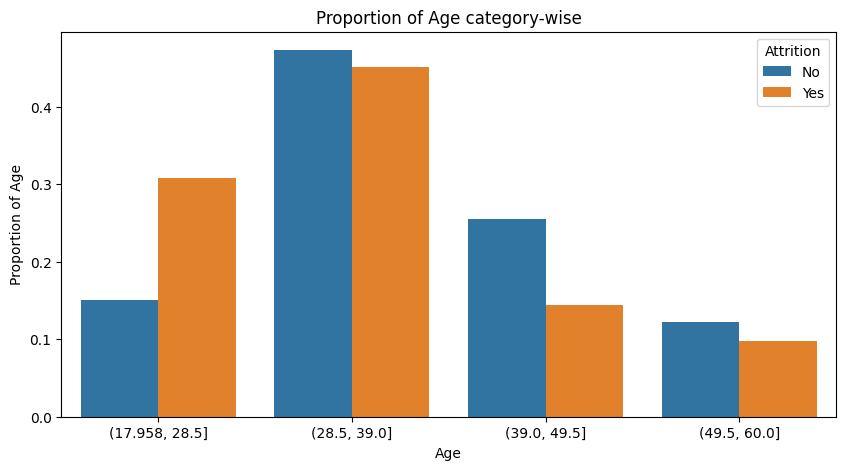

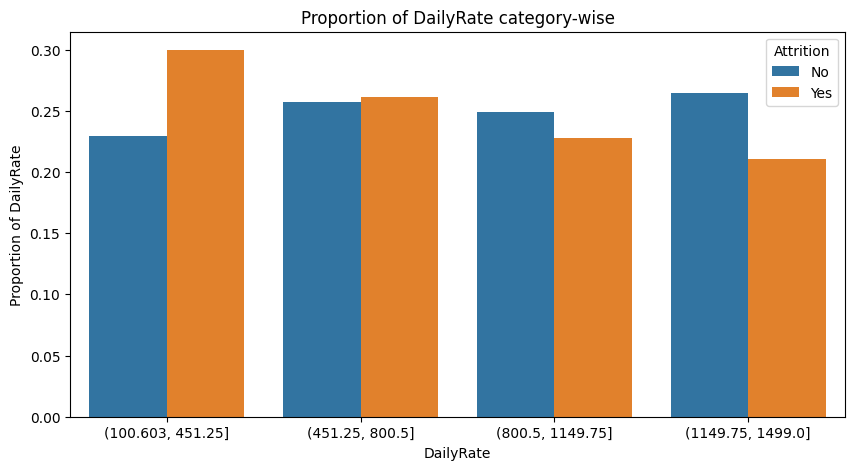

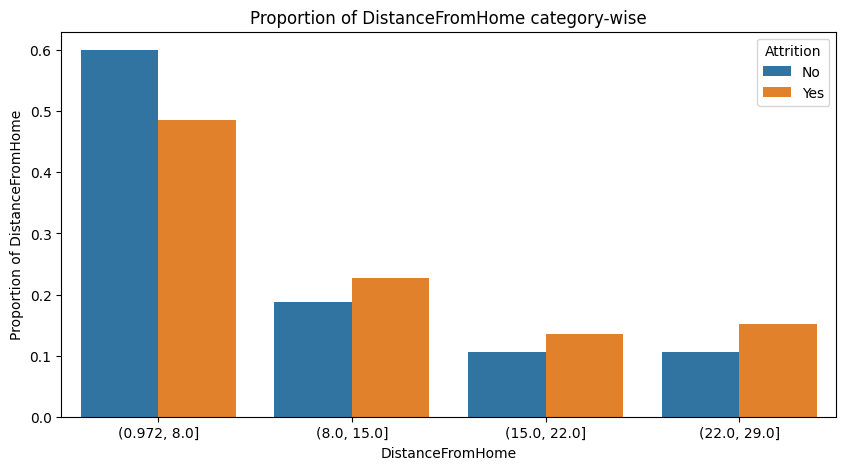

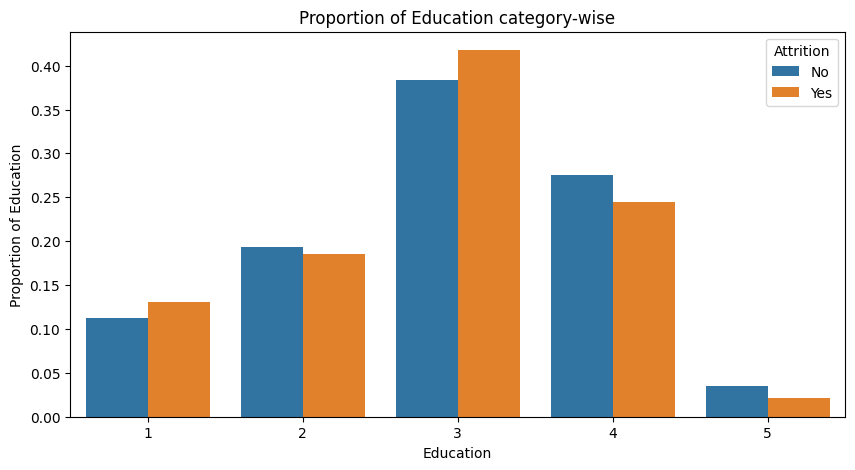

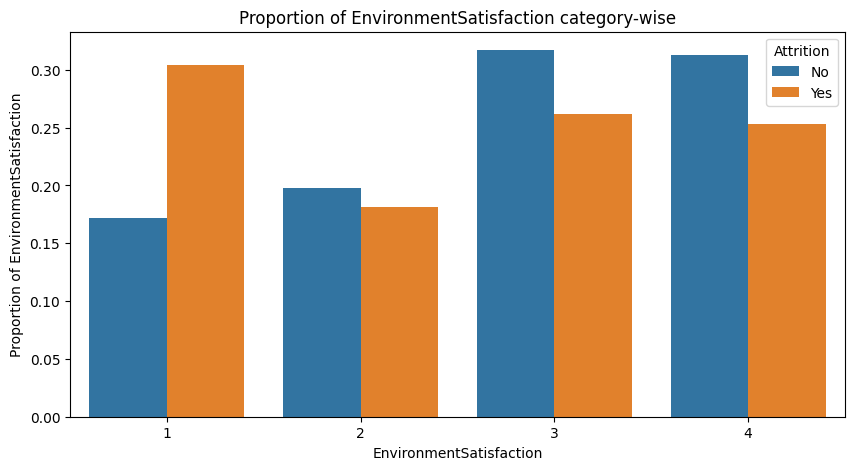

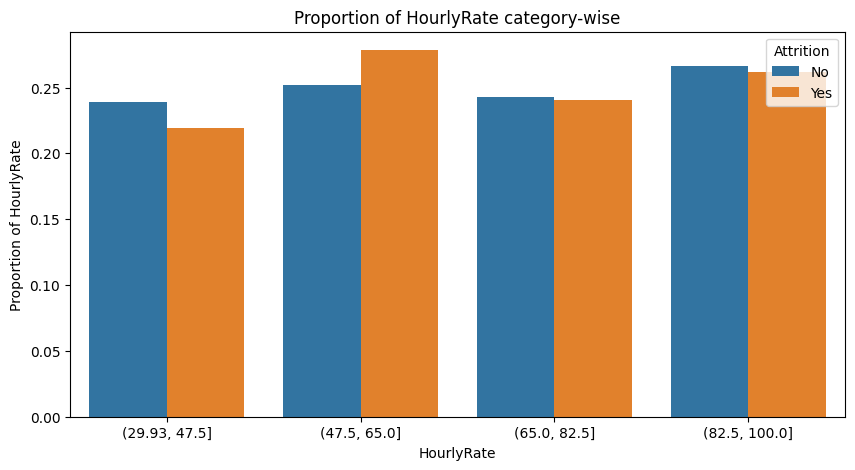

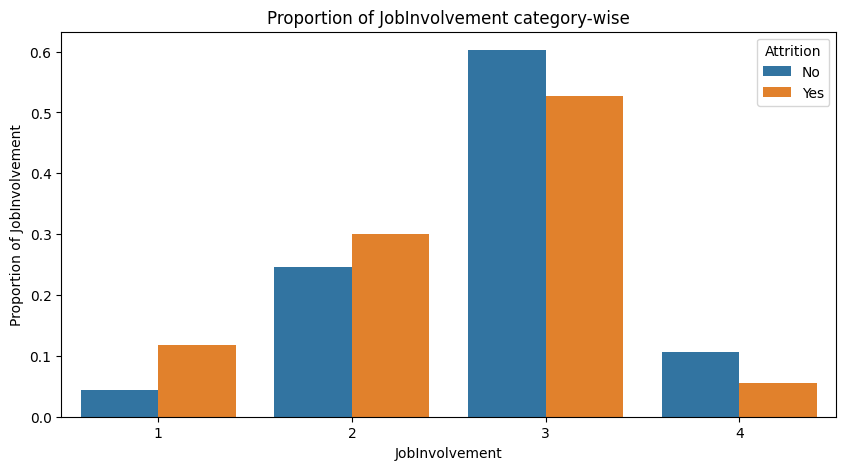

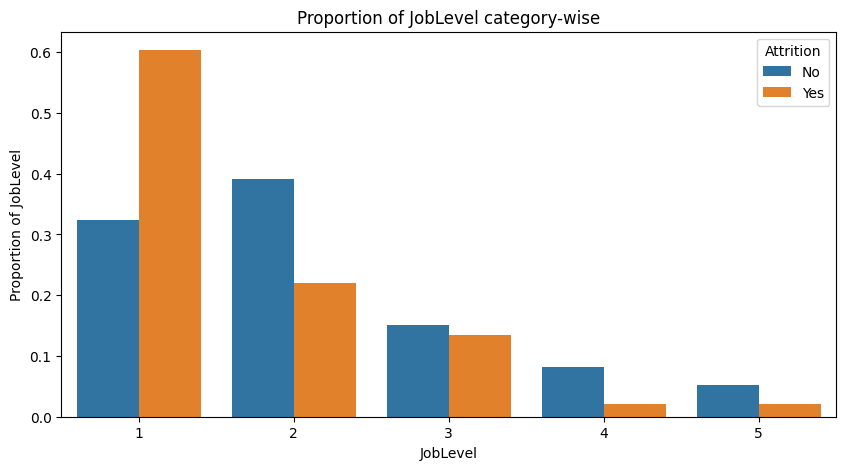

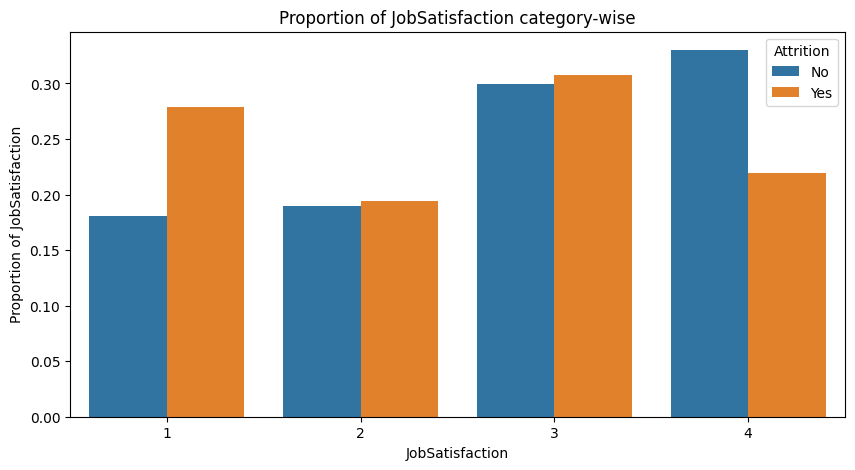

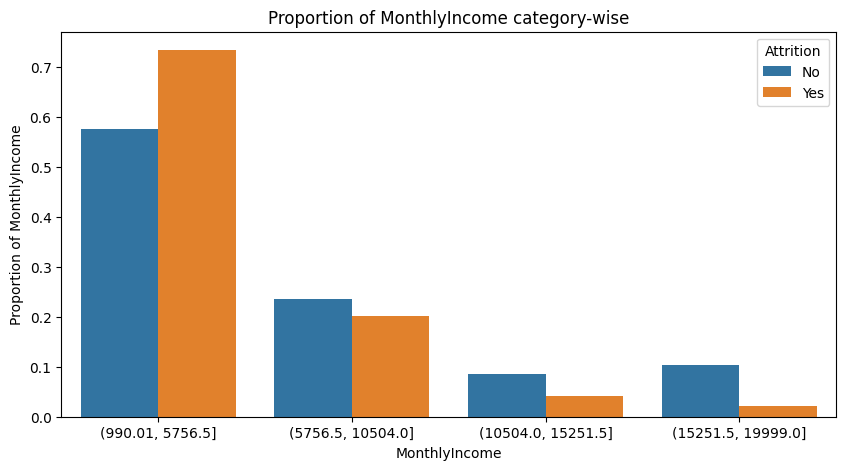

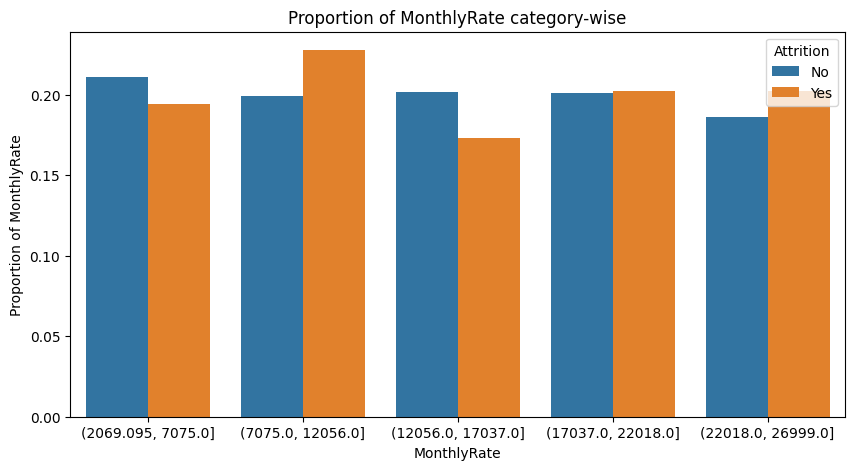

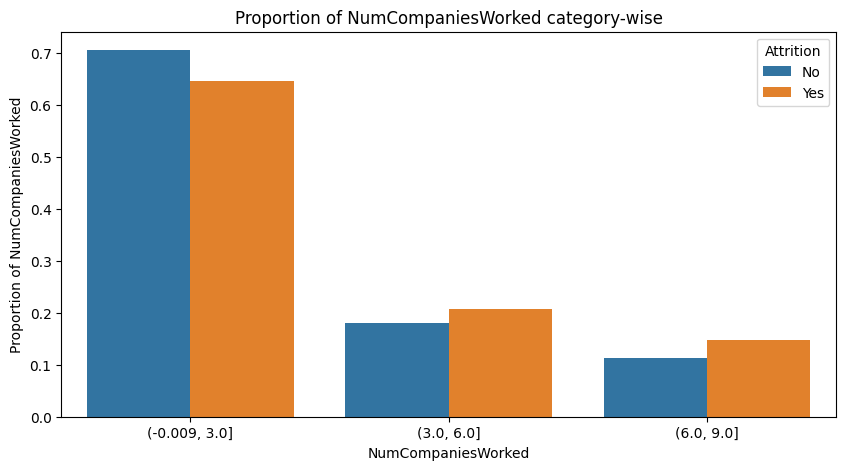

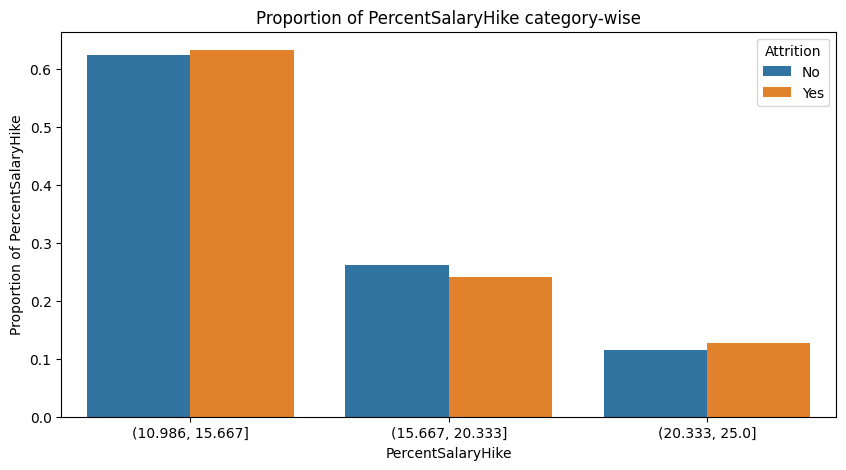

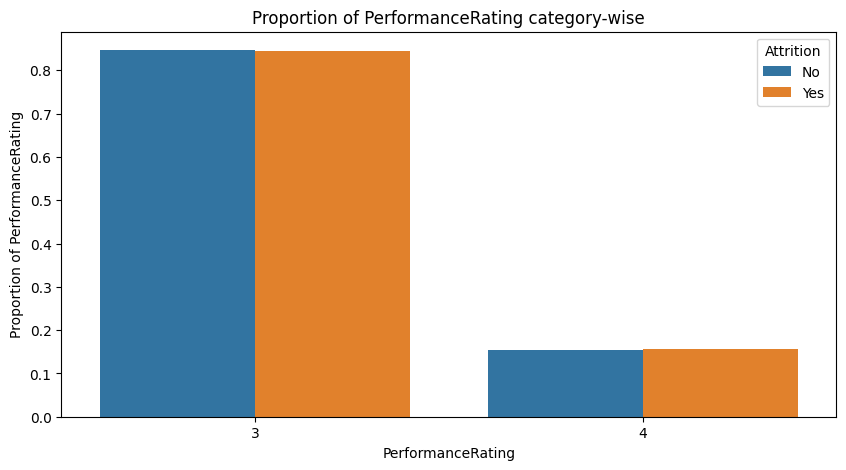

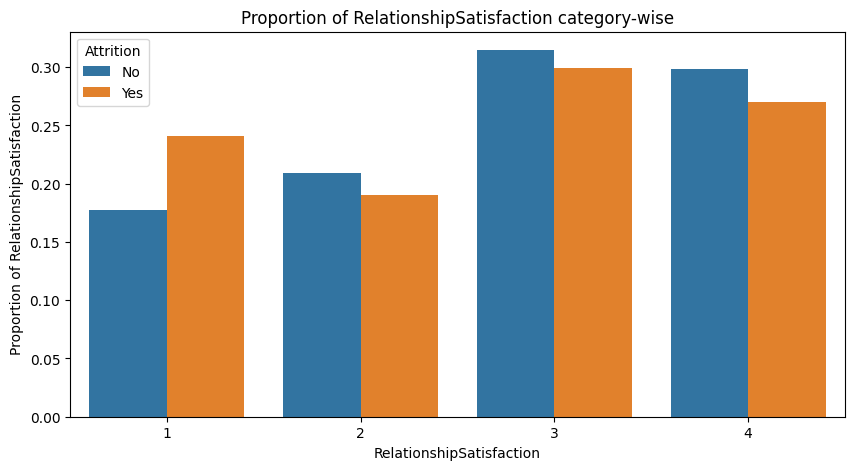

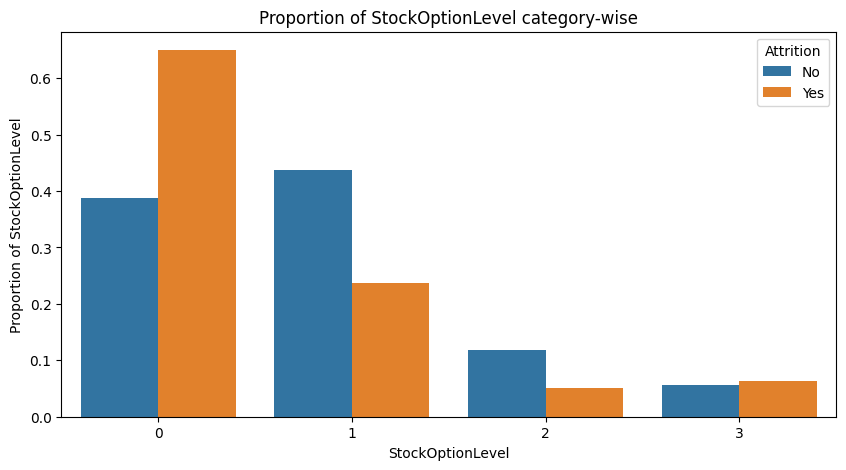

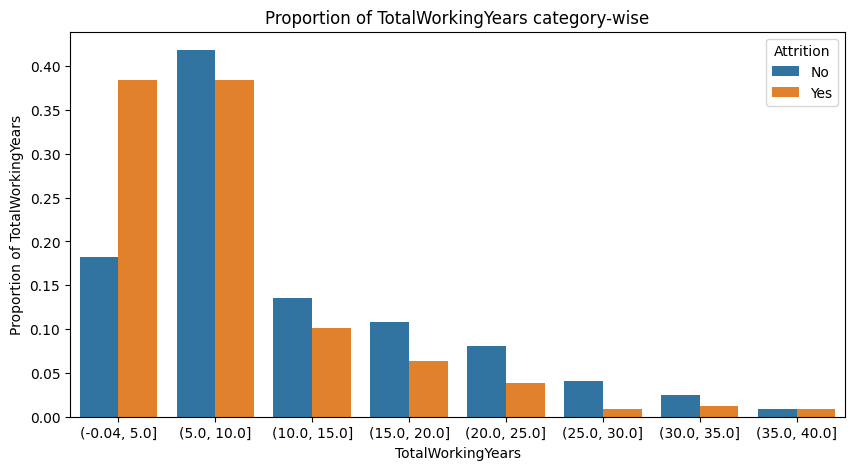

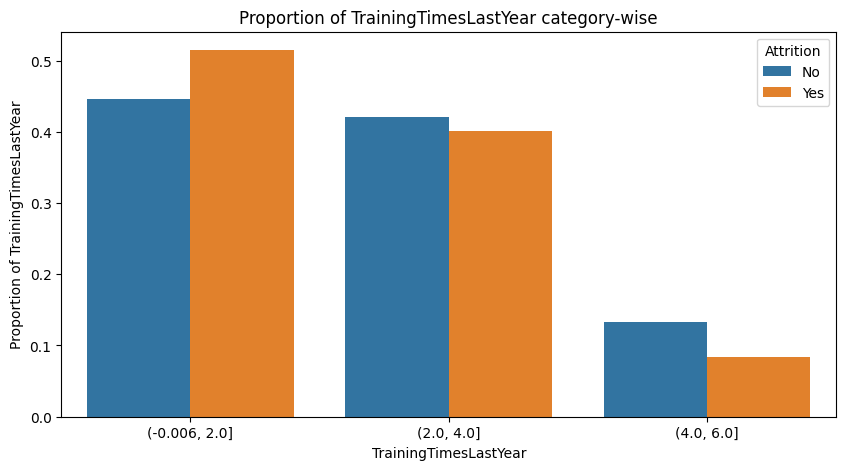

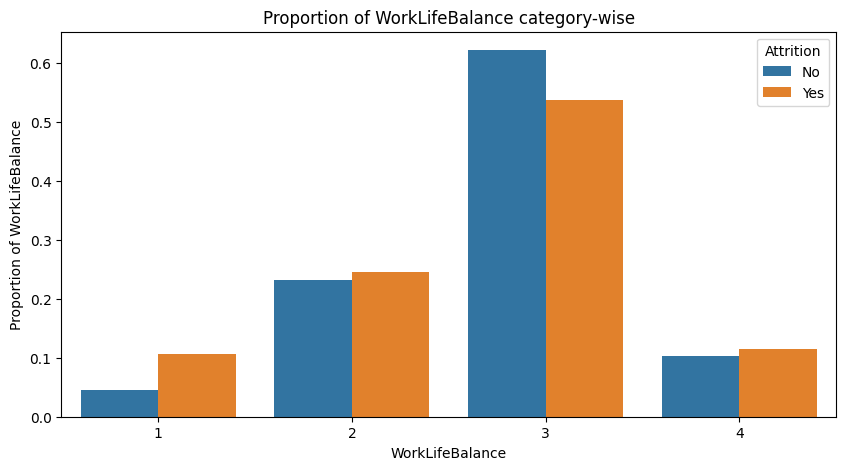

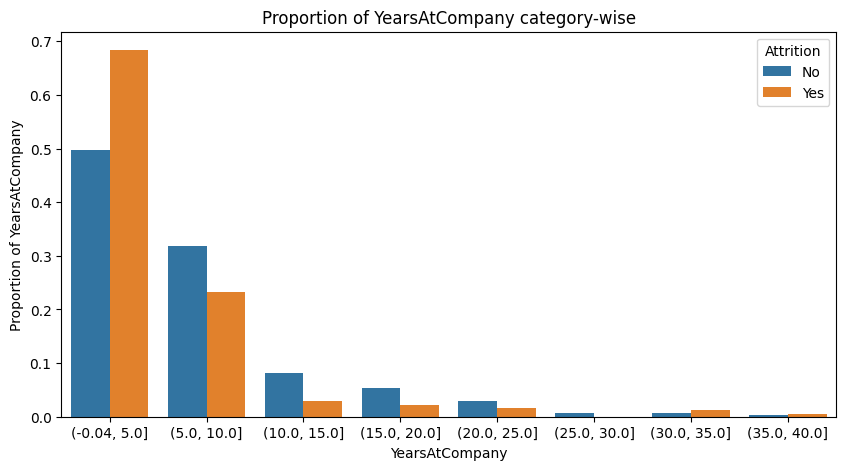

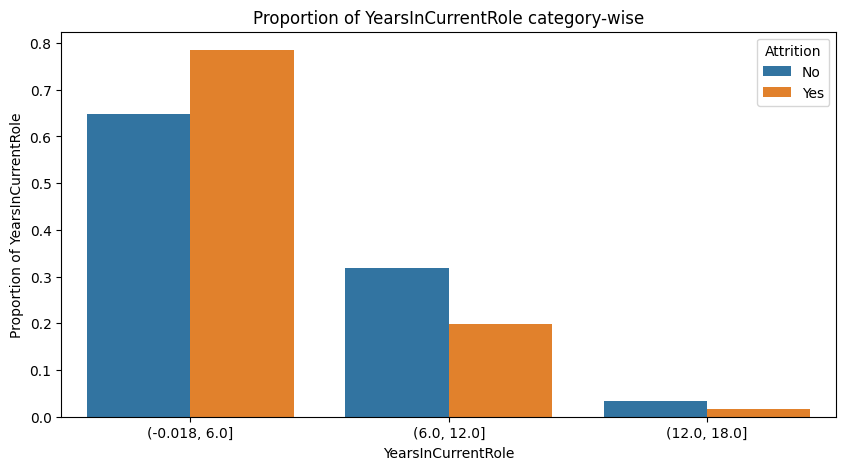

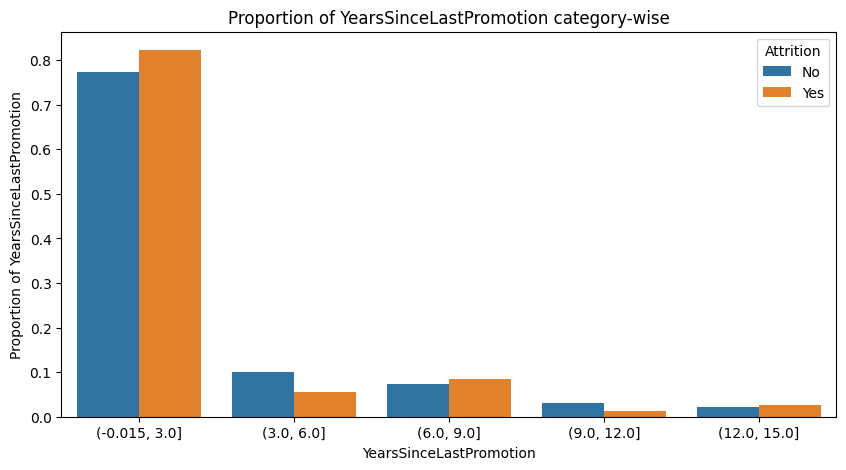

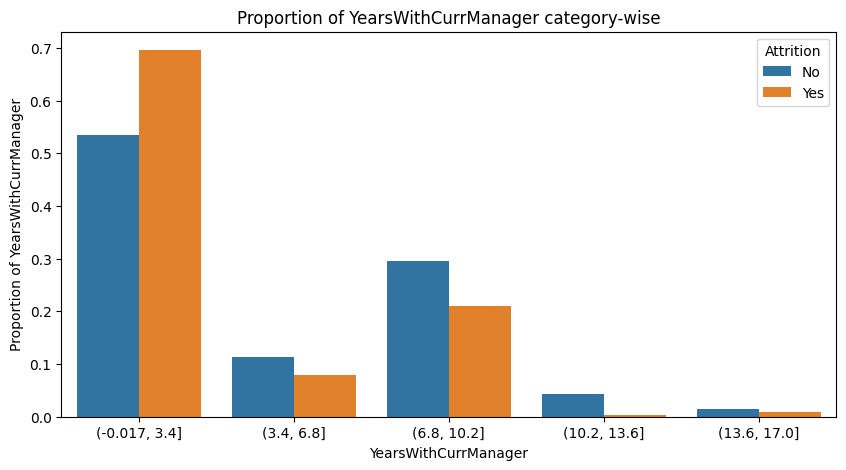

In [220]:
for i in df_segregated.columns[0:-1]:
    # sns.countplot(df_segregated, x=i,  hue="Attrition",order = df_segregated[i].value_counts().index)
    type='Proportion'
    plt.figure(figsize=(10,5))
    (df_segregated[i]
    .groupby(df_segregated['Attrition'])
    .value_counts(normalize=True)    ### Will calculate percentage if normalize=True and Will calculate count if normalize=False
    .rename(f'{type} of {i}')
    .reset_index()
    .pipe((sns.barplot, "data"), x=i, y=f'{type} of {i}', hue='Attrition'))
    # plt.xticks(rotation=65)
    plt.title(f'{type} of {i} category-wise')
    plt.show()

### Findings from above analysis
1. Age : Maximum proprtion of employees lies in [28.5- 39] but attrition rate is higher in age group of [18-28.5]
2. Daily rate : Maximum attrition is in the range of [100-451]
3. DistanceFromHome: Maximum proprtion of employees lies in [0-8] range and attrition proportion is higher in rest of the categories.
4. Monthly_rate : Maximum proportion lies in the range of [7075-12056]
5. Monthly_Income : Maximum proportion of employees as well as attririon is also highest in the range of [1000-5756]
6. NumCompaniesWorked : People worked in [0-3] companies have high attrition tendency.
7. PercentSalaryHike : People with salary hike in the range of [11-16] have high attrition tendency which is lowest range in provided data. 
8. TotalWorkingYears : Maximum employess have [0-10] years of experience with high attrition tendency in [0-5] years of experience.
9. YearsAtCompany : Maximum employess have spent [0-5] years at company with high attrition tendency also.
10. YearsInCurrentRole: Maximum employess with current role in [0-6] years have high attrition tendency.
11. YearsSinceLastPromotion: Maximum employess with [0-3] years since last promotion have high attrition tendency.
12. YearsWithCurrManager : Maximum employess with [0-3.4] years with current manager have high attrition tendency.
13. TrainingTimesLastYear: Maximum employess with [0-2] years of training time have high attrition tendency.
14. HourlyRate : Maximum proportion of employees with high attrition lies in the range of [47.5-65] hourly rate.
 * **Ordinal Varibales**
15. JobInvolvement : Maximum employees lies in 3rd group.
16. JobLevel : Employees in 1 category have highest attrition.
17. JobSatisfaction : Maximum attrition is in 1st category.
18. EnvironmentSatisfaction : The results are similar to JobSatisfaction.
19. StockOptionLevel : Highest attrition is in 0 group.
20. WorkLifeBalance : Maximum employees lies in 3rd category.
22. Education : Maximum employees lies in 3rd category with high attrition proprtion.

#### Checking the Unique values for identifying the categorical variable and dropping the variable with only one value.

In [13]:
### Maximum 6 unique values are available and this information is available in problem statement
for i in df_copy.select_dtypes(include=int):  ### for ordinal/nominal columns
    if df_copy[i].nunique()<7:
        df_copy[i]=df_copy[i].astype('category')

for i in df_copy.select_dtypes(include=object):   #### For Object Columns
    df_copy[i]=df_copy[i].astype('category')

In [14]:
df_copy.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [15]:
#### Plotting Box plot for integer type columns
### As Range of data in columns are very far from each other so we need to seperate the data for box plot visualization
def BoxPlot(data,treatment='Not Mentioned'):
    print(f"Treatment is {treatment}")
    df_plot=data.select_dtypes(exclude='category').apply(pd.to_numeric)
    df_high=df_plot.select_dtypes(exclude='category').loc[:,((df_plot>=1000) & (df_plot<=27000)).all()]
    df_mid=df_plot.select_dtypes(exclude='category').loc[:,((df_plot>=100) & (df_plot<=1500)).all()]
    df_low=df_plot.select_dtypes(exclude='category').loc[:,((df_plot>=0) & (df_plot<=100)).all()]
    # df_1.boxplot(by='Attrition',layout=(7,5),figsize=(30,30))
    # plt.show()
    # print(df_high.columns,'\n',df_mid.columns,'\n',df_low.columns)
    for i in [df_high,df_mid,df_low]:
        i.boxplot(figsize=(10,5),grid=False)
        plt.xticks(rotation=90)
        plt.show()
    

Treatment is Not Done


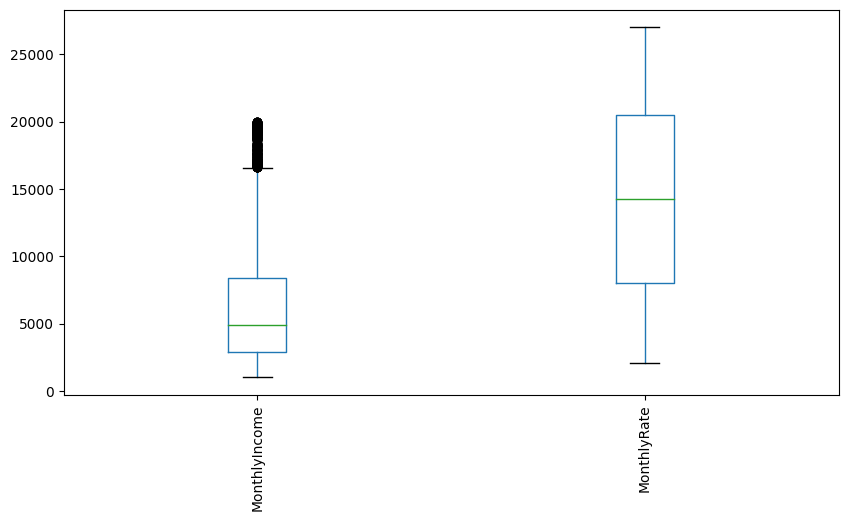

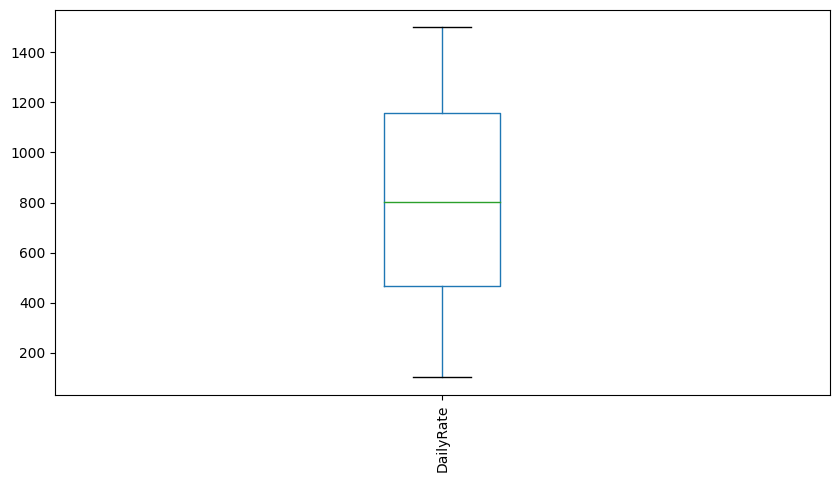

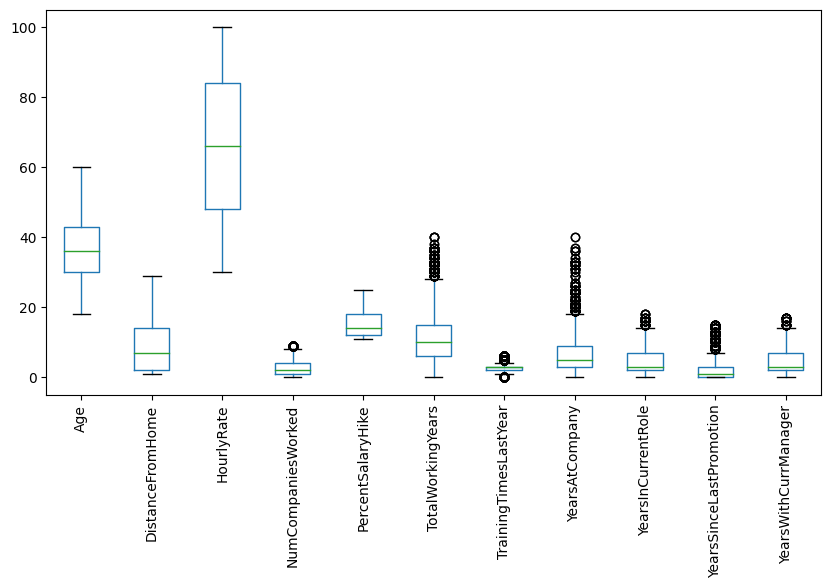

In [16]:
BoxPlot(df_copy,treatment='Not Done')

#### Null Value Treatment

In [17]:
total = df_copy.isnull().sum().sort_values(ascending=False)
percent = (df_copy.isnull().sum()/df_copy.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data[missing_data.Percent>40])

Empty DataFrame
Columns: [Total, Percent]
Index: []


#### No NULL Values in the data

#### Outlier Treatment

In [18]:
def outlier_treatment(data,cat):
    for col in data.columns:
        if cat=='int':
            quartiles=np.quantile(data[col],
                                [0,.25,.5,.75,1])
            q1=quartiles[1]
            median=quartiles[2]
            q3=quartiles[3]
            data[data.loc[data[col]>q3]].at[col]=median
            data[data.loc[data[col]<q1]].at[col]=median
        # elif cat=='category':
        #     mode=data[col].mode()
        #     data[data.loc[data[col]>q3]].at[col]=mode
        #     data[data.loc[data[col]<q1]].at[col]=mode
        
    return data

In [19]:
# df_cat=df_copy.select_dtypes(include='category')
# df_int=df_copy.select_dtypes(exclude='category')
# df_int=outlier_treatment(df_int,cat='int')
# final_df=pd.merge(df_cat,df_int,right_index=True,left_index=True)
# BoxPlot(final_df,treatment="Done")

In [20]:
### Encoding the Categorical Variables
def encoding(final_df):
    for i in final_df.select_dtypes(include='category'):
        final_df[i]=final_df[i].cat.codes
    return final_df

In [21]:
final_df=encoding(df_copy)
final_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,49,0,1,279,1,8,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,37,1,2,1373,1,2,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,33,0,1,1392,1,3,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,27,0,2,591,1,2,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2


### Correlation and Dropping the redundant variables

In [22]:
def Correlation(final_df,corr_limit=0.7):
    df_corr=final_df.corr()
    plt.figure(figsize=(18,18))
    sns.heatmap(df_corr[df_corr>corr_limit],annot=True,fmt='.2f',cmap='coolwarm')
    plt.show()


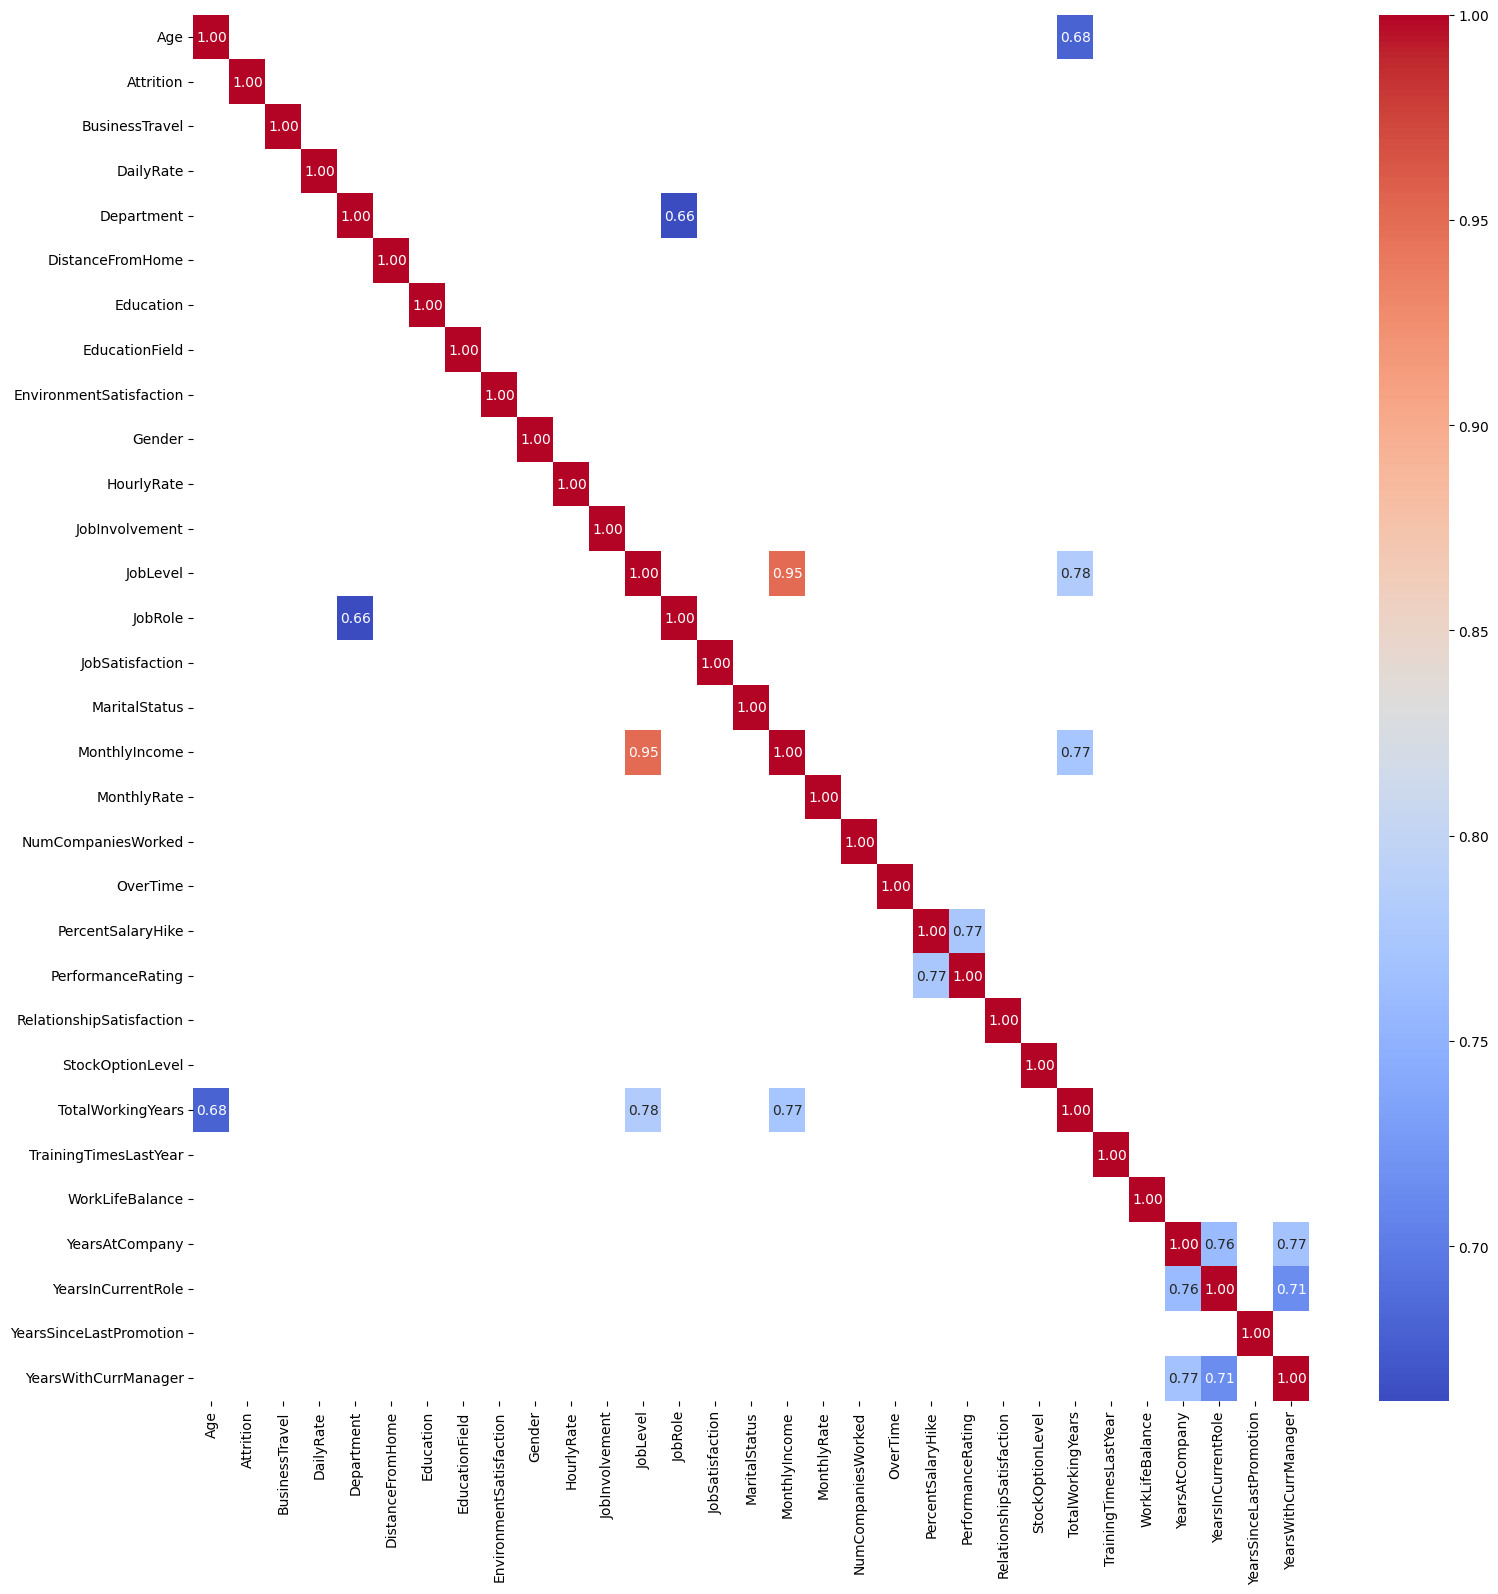

In [23]:
Correlation(final_df,corr_limit=.65)

In [24]:
# help(sns.heatmap)

#### Dropping the variable with more than 70% correlation
def Dropping_correlated_col(df,final_df,threshold=.7):
    corr_col={}

    ### Identifying the columns with highly correlated values
    for index1,rows in df.iterrows():
            for index,values in rows.items():
                  if values>threshold:
                        if index in corr_col:
                              pass
                        elif index1!=index and index1 in corr_col:
                              # print(f"inside if \n index1 is {index1} and index is {index}")
                              corr_col[index1].append(index)
                        elif index1!=index and ~(index1 in corr_col):
                              # print(f"Inside elif \n index1 is {index1} and index is {index}")
                              corr_col[index1]=[]
                              corr_col[index1].append(index)
    
    ### Dropping the columns with correlated values
    print(f"{len(corr_col.keys())} columns will be deleted with name {list (corr_col.keys())}")
    final_df.drop(columns=list(corr_col.keys()),inplace=True)
          

    return final_df

In [25]:
final_df=Dropping_correlated_col(final_df.corr(),final_df,threshold=.7)
final_df.shape

5 columns will be deleted with name ['JobLevel', 'MonthlyIncome', 'PercentSalaryHike', 'YearsAtCompany', 'YearsInCurrentRole']


(2940, 26)

### Splitting the data set into dependent and independent variables

In [26]:
target=final_df['Attrition']
independent_var=final_df.loc[:, final_df.columns != 'Attrition']
independent_col=independent_var.columns

### Normalization of Data

In [27]:
def standerization(data):
    standard_scaler = StandardScaler()
    data_tranformed =  standard_scaler.fit_transform(data)
    return data_tranformed

In [28]:
std=standerization(independent_var)
independent_var = pd.DataFrame(data = std, columns = independent_col)
independent_var.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-0.660531,-1.224745,1.383138,...,2.125136,1.591746,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.679146,0.245834
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.254625,0.816497,-0.240677,...,-0.678049,-0.628241,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,-0.368715,0.806541
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,1.169781,0.816497,1.284725,...,1.324226,1.591746,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-0.679146,-1.155935
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,1.169781,-1.224745,-0.486709,...,-0.678049,1.591746,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.252146,-1.155935
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.575686,0.816497,-1.274014,...,2.525591,-0.628241,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.058285,-0.595227


### Splitting of Data into train-test

In [29]:
x_train, x_test, y_train, y_test = train_test_split(independent_var,target,test_size =0.2)

## Making the Models

##### Decision Trees

In [47]:
model_dt = DecisionTreeClassifier(random_state=42)

In [48]:
# help(DecisionTreeClassifier)

### Hyperparameter Tuning

In [49]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': range(5,11),
              'min_samples_split':range(40,60,2),
              'min_samples_leaf':range(20,42,2),
              'max_features': ['sqrt', 'log2', None],
              'criterion': ['gini']
             }

cv_dt = GridSearchCV(model_dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = len(param_dist))

cv_dt.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_dt.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 20, 'min_samples_split': 40}
Time taken in grid search:  30.72


In [50]:
# Set best parameters given by grid search 
# model_dt.set_params(**cv_dt.best_params_)  ### Used to automatically set the best parameters obtained via GridSearch
model_dt.set_params(max_depth=9,
                    min_samples_split=35,
                    min_samples_leaf=20,
                    max_features=None,
                    criterion='gini')

DecisionTreeClassifier(max_depth=9, min_samples_leaf=20, min_samples_split=35,
                       random_state=42)

In [51]:
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",round(model_dt_score_train*100,2))
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",round(model_dt_score_test*100,2))

Training score:  88.48
Testing score:  87.24


#### Performance Matrices

In [52]:
y_pred_dt = model_dt.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [66]:
predictions = model_dt.predict(x_test)

In [70]:
# # Initialize y_actual_result to rectify the error

# indices = np.where(predictions == 1)[0]

# y_actual_result = np.empty((0, indices.shape[0]))

# # Use boolean indexing to get the corresponding rows from y_test
# y_actual_result = np.vstack((y_actual_result, y_test[indices]))

#### Recall

In [69]:
# y_actual_result = y_actual_result.flatten()
# count = 0
# for result in y_actual_result:
#      if(result == 1):
#         count=count+1

# print ("true yes|predicted yes:")
# print (count/float(len(y_actual_result)))

#### AUC

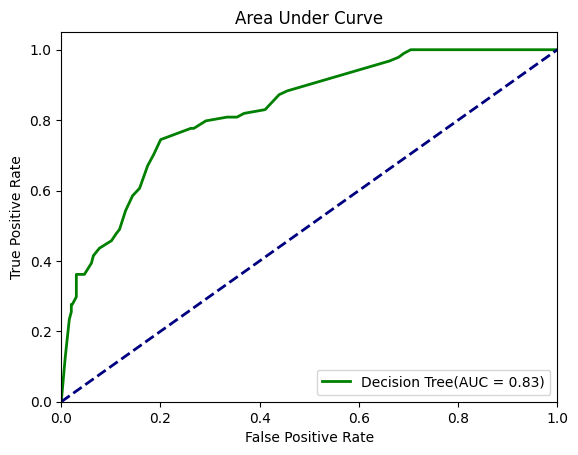

In [68]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

#### Plotting Confusion Matrix 

In [71]:
print (confusion_matrix(y_test, predictions))

[[479  15]
 [ 60  34]]


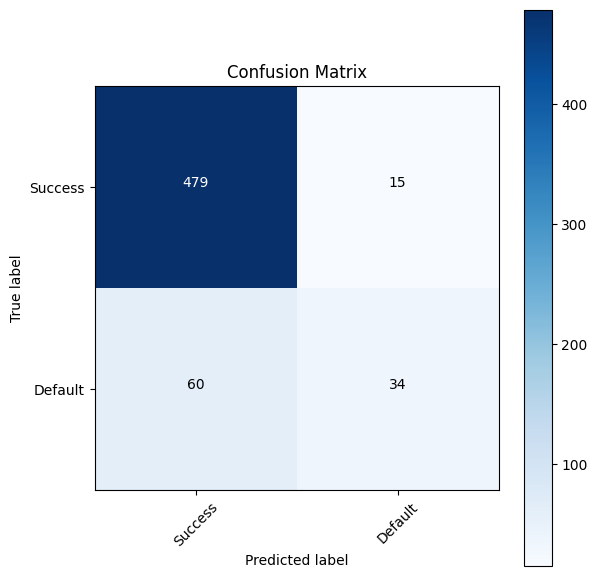

In [72]:

import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

### Random Forest

In [41]:
fit_rf = RandomForestClassifier(random_state=42)

In [315]:
# help(RandomForestClassifier)

#### Hyper-Parameter Tuning

In [42]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': range(1,7),
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini']
             }

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = len(param_dist))

cv_rf.fit(x_train,y_train)
# print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f} sec'.format(end - start))

Time taken in grid search:  57.63 sec


In [43]:
# Set best parameters given by grid search 
fit_rf.set_params(**cv_rf.best_params_)

RandomForestClassifier(max_depth=6, max_features=None, random_state=42)

#### OOB Rate

In [318]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(x_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

c:\Users\MercadosEMI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

c:\Users\MercadosEMI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



In [319]:
# Convert dictionary to a pandas series for plotting 
oob_series = pd.Series(error_rate)

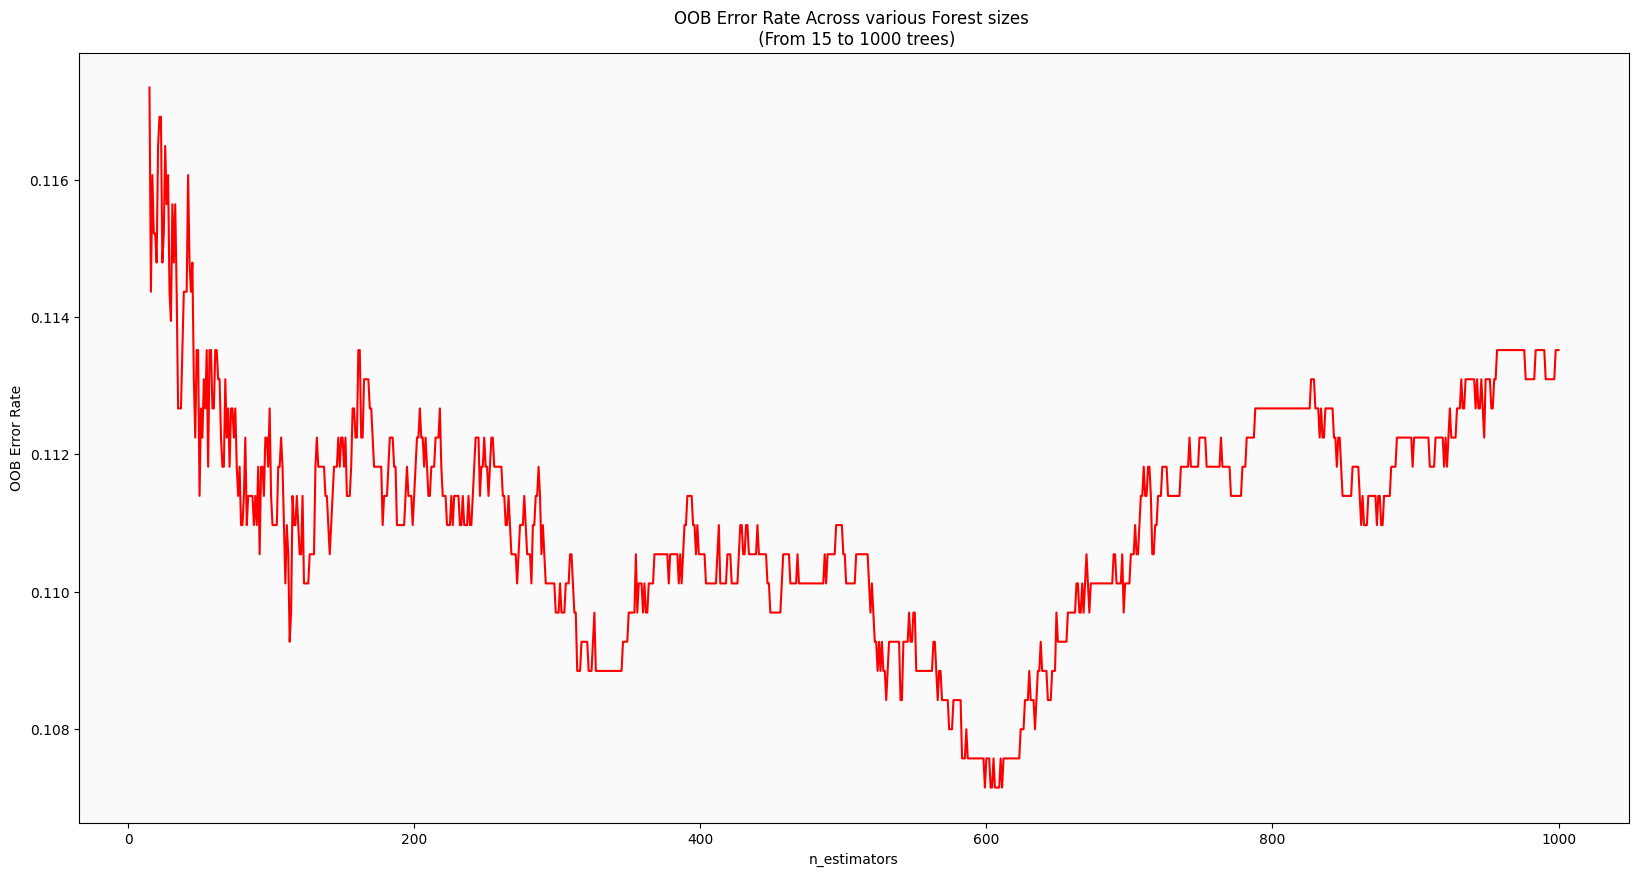

In [320]:

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
# plt.axhline(0.1160, color='#875FDB',linestyle='--')
# plt.axhline(0.1170, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title(f'OOB Error Rate Across various Forest sizes \n (From {min_estimators} to {max_estimators} trees)')
plt.show()

In [44]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=250,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=6, max_features=None, n_estimators=250,
                       random_state=42)

#### Training of the model

In [45]:
fit_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, max_features=None, n_estimators=250,
                       random_state=42)

#### Accuracy of the model

In [46]:
test_accuracy_rf = fit_rf.score(x_test, y_test)

print("Here is our mean accuracy on the test set:\n {0:.2f}"\
      .format(test_accuracy_rf*100))
train_accuracy_rf = fit_rf.score(x_train, y_train)

print("Here is our mean accuracy on the train set:\n {0:.2f}"\
      .format(train_accuracy_rf*100))

Here is our mean accuracy on the test set:
 90.31
Here is our mean accuracy on the train set:
 93.15


#### Performance Matrices

In [76]:
y_pred_rf = fit_rf.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

In [81]:
predictions = fit_rf.predict(x_test)

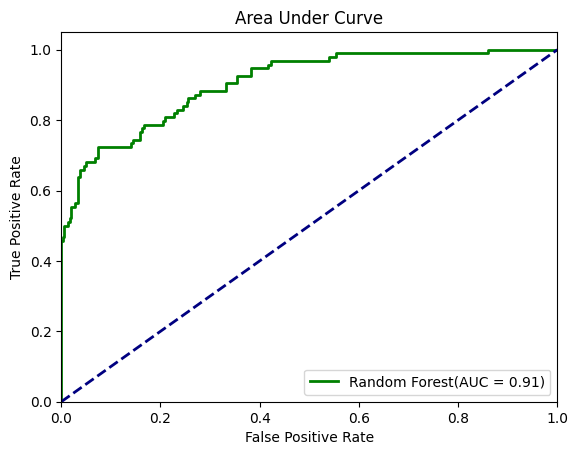

In [83]:
plt.figure(1)
lw = 2
plt.plot(fpr_rf, tpr_rf, color='green',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

#### Plotting confusion matrix

In [84]:
print (confusion_matrix(y_test, predictions))

[[494   0]
 [ 57  37]]


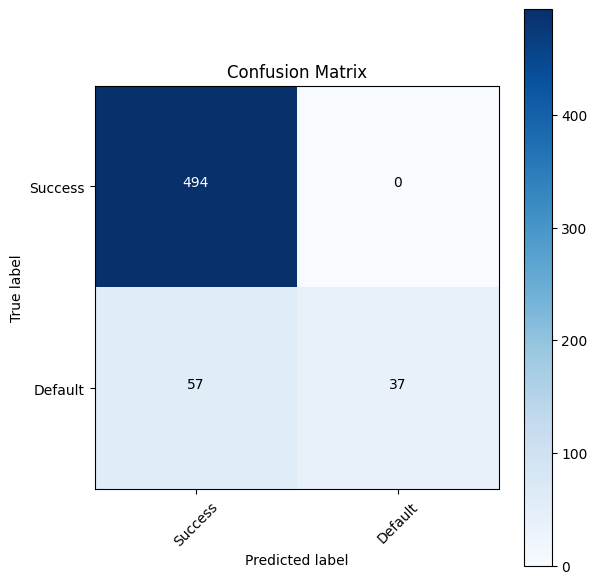

In [85]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

### Variable Importance

In [86]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [87]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [89]:
names_index=x_test.columns

#### Plotting variable Importance

In [97]:
def variable_importance_plot(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    # ax.set_axis_bgcolor('#fafafa')
    plt.title('Feature importances for Random Forest Model\
    \nHR Attrition')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 30)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

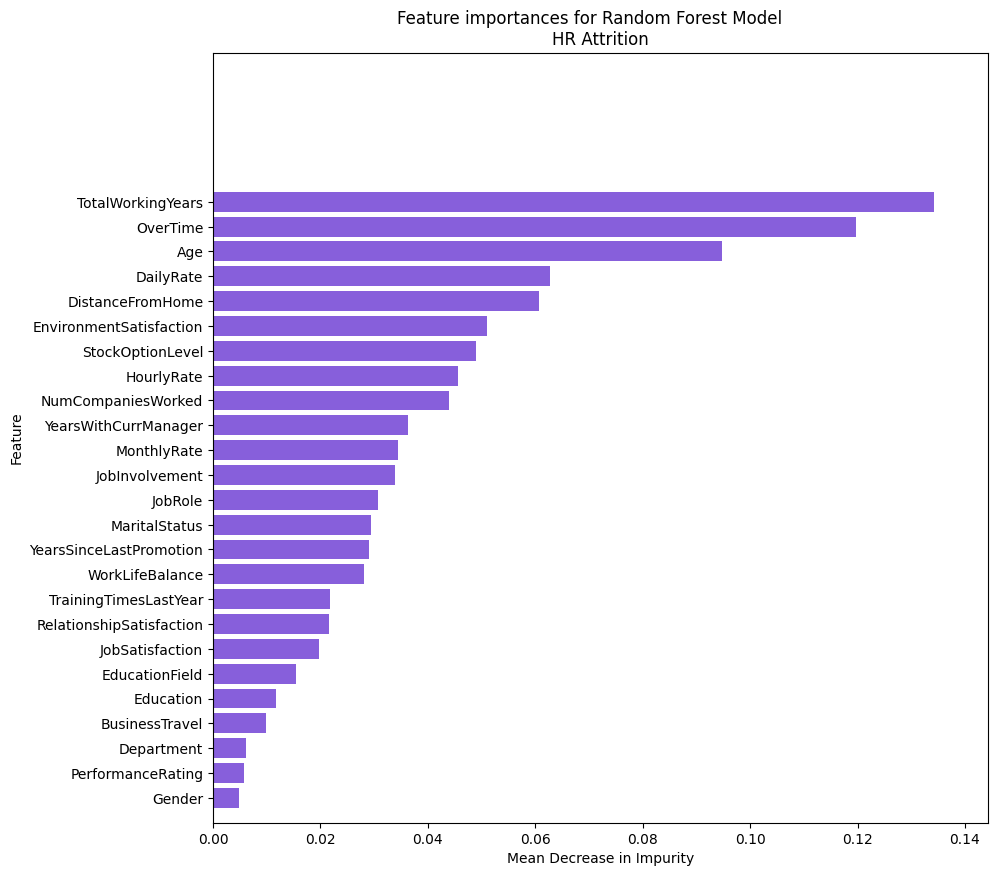

In [98]:
variable_importance_plot(importances_rf, indices_rf, names_index)